In [2]:
!pip install factor_analyzer
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

     |████████████████████████████████| 40 kB 3.1 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=6e52cc5313ab731ff9754dd698254ad0efe28d04945a486eb49dbb2850eeaa16
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Datasets/Covid-metrological Research/Mumbai_data.csv")

In [32]:
df.describe()

,Total cases,Daily new cases,Active cases,Total deaths,Daily deaths,Total recovered,Temperature (Celcius),Min Temperature (Celcius),Max Temperature (Celcius),Dew Temperature (Celcius),Rainfall/Precipitation (mm),Humidity (%),Windspeed (m/s),Wind Degree,Pressure (hPa)
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,221237.446927,1600.321229,21217.835196,8333.530726,34.256983,191142.941341,28.224078,26.067709,29.299777,22.088324,5.533492,69.325112,3.231453,201.583296,1008.013464
std,130726.457327,1884.838328,17177.260944,3653.698097,53.558271,122020.848656,1.646694,1.808643,1.640774,3.770849,22.722808,17.201289,0.741174,42.529461,3.808280
min,6644.000000,296.000000,3881.000000,270.000000,-68.000000,936.000000,23.570000,21.460000,25.230000,12.710000,0.000000,24.460000,1.920000,73.750000,994.000000
25%,110357.000000,657.250000,9320.500000,6145.750000,10.000000,82560.750000,27.252500,24.872500,28.132500,18.452500,0.000000,55.347500,2.710000,169.497500,1005.350000
50%,250670.000000,1036.000000,18868.500000,10082.000000,30.000000,221957.500000,28.400000,26.465000,29.270000,24.015000,0.000000,72.005000,3.045000,200.380000,1008.420000
75%,305015.250000,1513.500000,25593.750000,11284.750000,48.000000,286335.000000,29.255000,27.107500,30.357500,25.270000,1.900000,83.740000,3.610000,230.610000,1011.130000
max,601713.000000,10033.000000,91100.000000,12508.000000,917.000000,504466.000000,33.010000,30.470000,34.480000,26.690000,273.000000,99.000000,5.730000,301.960000,1014.380000


In [4]:
df.columns

Index(['Date', 'Total cases', 'Daily new cases', 'Active cases',
       'Total deaths', 'Daily deaths', 'Total recovered',
       'Temperature (Celcius)', 'Min Temperature (Celcius)',
       'Max Temperature (Celcius)', 'Dew Temperature (Celcius)',
       'Rainfall/Precipitation (mm)', 'Humidity (%)', 'Windspeed (m/s)',
       'Wind Degree', 'Pressure (hPa)'],
      dtype='object')

In [11]:
df.drop(['Date'],axis=1,inplace=True)

In [5]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total cases                  358 non-null    int64  
 1   Daily new cases              358 non-null    int64  
 2   Active cases                 358 non-null    int64  
 3   Total deaths                 358 non-null    int64  
 4   Daily deaths                 358 non-null    int64  
 5   Total recovered              358 non-null    int64  
 6   Temperature (Celcius)        358 non-null    float64
 7   Min Temperature (Celcius)    358 non-null    float64
 8   Max Temperature (Celcius)    358 non-null    float64
 9   Dew Temperature (Celcius)    358 non-null    float64
 10  Rainfall/Precipitation (mm)  358 non-null    float64
 11  Humidity (%)                 358 non-null    float64
 12  Windspeed (m/s)              358 non-null    float64
 13  Wind Degree         

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(15620.86238016996, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [15]:
#Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.663034539678409

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

In [16]:
df.shape

(358, 15)

In [21]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#print(dir(fa))
#fa.analyze(df, 15, rotation=None)
# Check Eigenvalues
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.96873521e+00, 3.43756485e+00, 1.91324398e+00, 1.07156098e+00,
       8.14441530e-01, 6.53030899e-01, 5.21621264e-01, 2.89399729e-01,
       1.92533620e-01, 5.83298498e-02, 4.23181366e-02, 2.43312165e-02,
       1.28879921e-02, 5.73439612e-07, 1.73490985e-07])

Here, you can see only for 4-factors eigenvalues are greater than one. It means we need to choose only 4 factors (or unobserved variables).

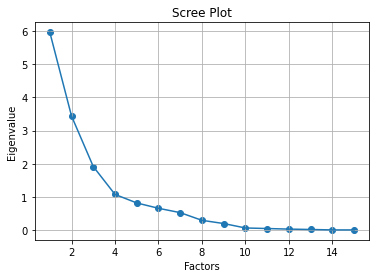

In [23]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [27]:
df.columns

Index(['Total cases', 'Daily new cases', 'Active cases', 'Total deaths',
       'Daily deaths', 'Total recovered', 'Temperature (Celcius)',
       'Min Temperature (Celcius)', 'Max Temperature (Celcius)',
       'Dew Temperature (Celcius)', 'Rainfall/Precipitation (mm)',
       'Humidity (%)', 'Windspeed (m/s)', 'Wind Degree', 'Pressure (hPa)'],
      dtype='object')

In [36]:
# Create factor analysis object and perform factor analysis
#fa = FactorAnalyzer()
#fa.analyze(df, 6, rotation="varimax")
fa = FactorAnalyzer()
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(df)
loadings = fa.loadings_
loadings

array([[-0.62412121, -0.15928566,  0.72890818, -0.23028119],
       [ 0.0418135 ,  0.32167051,  0.88190489,  0.06032684],
       [ 0.28808887,  0.29964795,  0.83219288,  0.08363395],
       [-0.61346924, -0.38346497,  0.49487572, -0.27381641],
       [ 0.43916764,  0.07954083,  0.00135792,  0.06106257],
       [-0.68971491, -0.19950167,  0.63873869, -0.24920209],
       [ 0.1105415 ,  0.98270196,  0.0764887 , -0.01885288],
       [ 0.44296371,  0.8381721 ,  0.07728013,  0.14661463],
       [-0.07072246,  0.9567164 ,  0.18775015, -0.03251491],
       [ 0.87758373,  0.29867188,  0.10354014,  0.26146657],
       [ 0.16201373, -0.18117   ,  0.00756888,  0.5651808 ],
       [ 0.90303523, -0.13337265,  0.07410522,  0.29614274],
       [ 0.29570149,  0.2410341 , -0.14640453,  0.62192427],
       [ 0.18251538,  0.26698832,  0.09513643,  0.29223771],
       [-0.71293298, -0.08788265,  0.02718557, -0.51503956]])

In [37]:
## convert your array into a dataframe
data = pd.DataFrame (loadings)

## save to xlsx file

filepath = 'my_excel_file.xlsx'

data.to_excel(filepath, index=False)

Factor 1 has high factor loadings for col0,col3, col5,col9,col11,col14

Factor 2 has high factor loadings for col6,col7,col8

Factor 3 has high factor loadings for col0,col1,col2,col5

Factor 4 has high factor loadings for col10,col12,col14 


In [31]:
fa.get_factor_variance() #Total 76% cumulative Variance explained by the 4 factors

(array([3.9735271 , 3.27226693, 2.74906587, 1.44033069]),
 array([0.26490181, 0.21815113, 0.18327106, 0.09602205]),
 array([0.26490181, 0.48305294, 0.66632399, 0.76234604]))